# Analysis of Groundwater Level Data in Colorado
- Author: Aaron Jimenez

### Purpose and Research Goals

The purpose of this project is two-fold. I wanted to determine if there was a consistent trend or change in groundwater levels in the state of Colorado, and I wanted to identify if these trends showed the existence of a relationship with drought severity and wildfire severity. These two questions guided my analysis. 

## Necessary Code To Reproduce Presentation Figures 6 and 7 

In [1]:
# necessary imports to analyze and plot this data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Figure 6: Groundwater Analysis for Colorado Springs

#### Step 1: Read in USGS data

The data were collected by the USGS National Groundwater Monitoring Network. The dataset was created by selecting individual sites located in and around Colorado Springs, the area of interest, and downloading all data associated with those sites into a single csv file. 

This format is quite useful for narrowing down to a specific location, however, the data contained issues that made analysis using multiple sites at once quite difficult. The sampling rate varied from site to site, as well as the start date for the samples. Many sites started sampling in 2021, with multiple samples taken every month, whereas sites that started earlier had a sample every couple months. The water depth also varied drastically from site to site, with some sites containing measurements of 100 feet or less below the surface, and other sites at nearly the exact same geographic location varying from 5000-7000 feet below the ground surface. The ones with extreme depth were also strongly concentrated in the sites that began taking measurements in only the last 2-3 years, which made any analysis of general trends across sites nearly impossible across that point in time. 

The issues with sampling rate and time applied to comparative analysis with drought and wildfire data as well. Combining these different data types proved too difficult for the time constraints of this project, so analysis was conducted separately and then cross-referenced with the relative dates of other analysis to look for correlations. 

In [2]:
# read in groundwater data from Colorado Springs 
filepath = "../data/groundwater_data/USGS_ColoradoSprings/WATERLEVEL.csv"
gr_colo_spr = pd.read_csv(filepath)
gr_colo_spr.dtypes

AgencyCd                                     object
SiteNo                                        int64
Time                                         object
Original Parameter                          float64
Original Direction                          float64
Original Unit                                object
Original Value                              float64
Accuracy Unit                                object
Accuracy Value                               object
Depth to Water Below Land Surface in ft.    float64
Water level in feet relative to NGVD29      float64
Comment                                     float64
Observation Method                          float64
Data Provided by                            float64
Unnamed: 14                                 float64
dtype: object

#### Step 2: Analysis 

My specific goal in analyzing Colorado Springs Data was to look for trends and correlations between groundwater level, drought severity, and wildfire severity on a site-by-site basis. I selected three to complete my analysis: site 385607104230801, site 385344104242401, and site 384506104241302. The reasoning behind the selection of these three sites was that these sites contained measurements taken back until 2002, while the other sites only contained data starting from 2021. I was most interested in the data around the year 2012, as a large fire occured that year, and I hoped to determine if groundwater level data correlated to that year. 

The steps I took to process the data were simple. 
- read in each selected site into separate dataframes
- take the "Time" column, in which the data are presented as an object class closely formatted with datetime objects, and convert each value to a datetime object
- extract the year from the datetime column and store it in a new column


In [3]:
# make an array of each unique site number for easier reference
gr_colo_spr_sites = gr_colo_spr['SiteNo'].unique()
gr_colo_spr_sites

array([385607104230801, 385344104242401, 390010104385101, 390148104285401,
       385208104324401, 384824104332601, 384506104241302, 384348104232201,
       384348104232901], dtype=int64)

In [4]:
# make dataframe for each site, extract year and make new column

# step 1
gr_colo_spr_3856 = gr_colo_spr.loc[gr_colo_spr["SiteNo"] == 385607104230801]
# step 2
pd.to_datetime(gr_colo_spr_3856["Time"])
# step 3
gr_colo_spr_3856['Year'] = pd.DatetimeIndex(gr_colo_spr_3856['Time']).year

# step 1
gr_385344104242401 = gr_colo_spr.loc[gr_colo_spr["SiteNo"] == 385344104242401]
# step 2
pd.to_datetime(gr_385344104242401['Time'])
# step 3
gr_385344104242401['Year'] = pd.DatetimeIndex(gr_385344104242401['Time']).year

# step 1
gr_384506104241302 = gr_colo_spr.loc[gr_colo_spr["SiteNo"] == 384506104241302]
# step 2
pd.to_datetime(gr_384506104241302['Time'])
# step 3
gr_384506104241302['Year'] = pd.DatetimeIndex(gr_384506104241302['Time']).year

C:\Users\aaron\AppData\Local\Temp\ipykernel_26284\4008281708.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gr_colo_spr_3856['Year'] = pd.DatetimeIndex(gr_colo_spr_3856['Time']).year
C:\Users\aaron\AppData\Local\Temp\ipykernel_26284\4008281708.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gr_385344104242401['Year'] = pd.DatetimeIndex(gr_385344104242401['Time']).year
C:\Users\aaron\AppData\Local\Temp\ipykernel_26284\4008281708.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy 

#### Step 3: Plotting

For plotting the data, the necessary information I needed to extract related to groundwater level and time. Therefore, I plotted "Time" on the x-axis and "Original Value" on the y-axis. Time is a datetime object, with long, complex syntax in each point, so I used the "Year" column to show x ticks to increase readability. "Original Value" is given in feet below ground surface, which when plotted on the y-axis would make it the inverse of what the data represents in space. Therefore, I plotted the negative of these values, so that the relative height of the line on the y-axis of the graph would match the relative changes of the water level in space. 

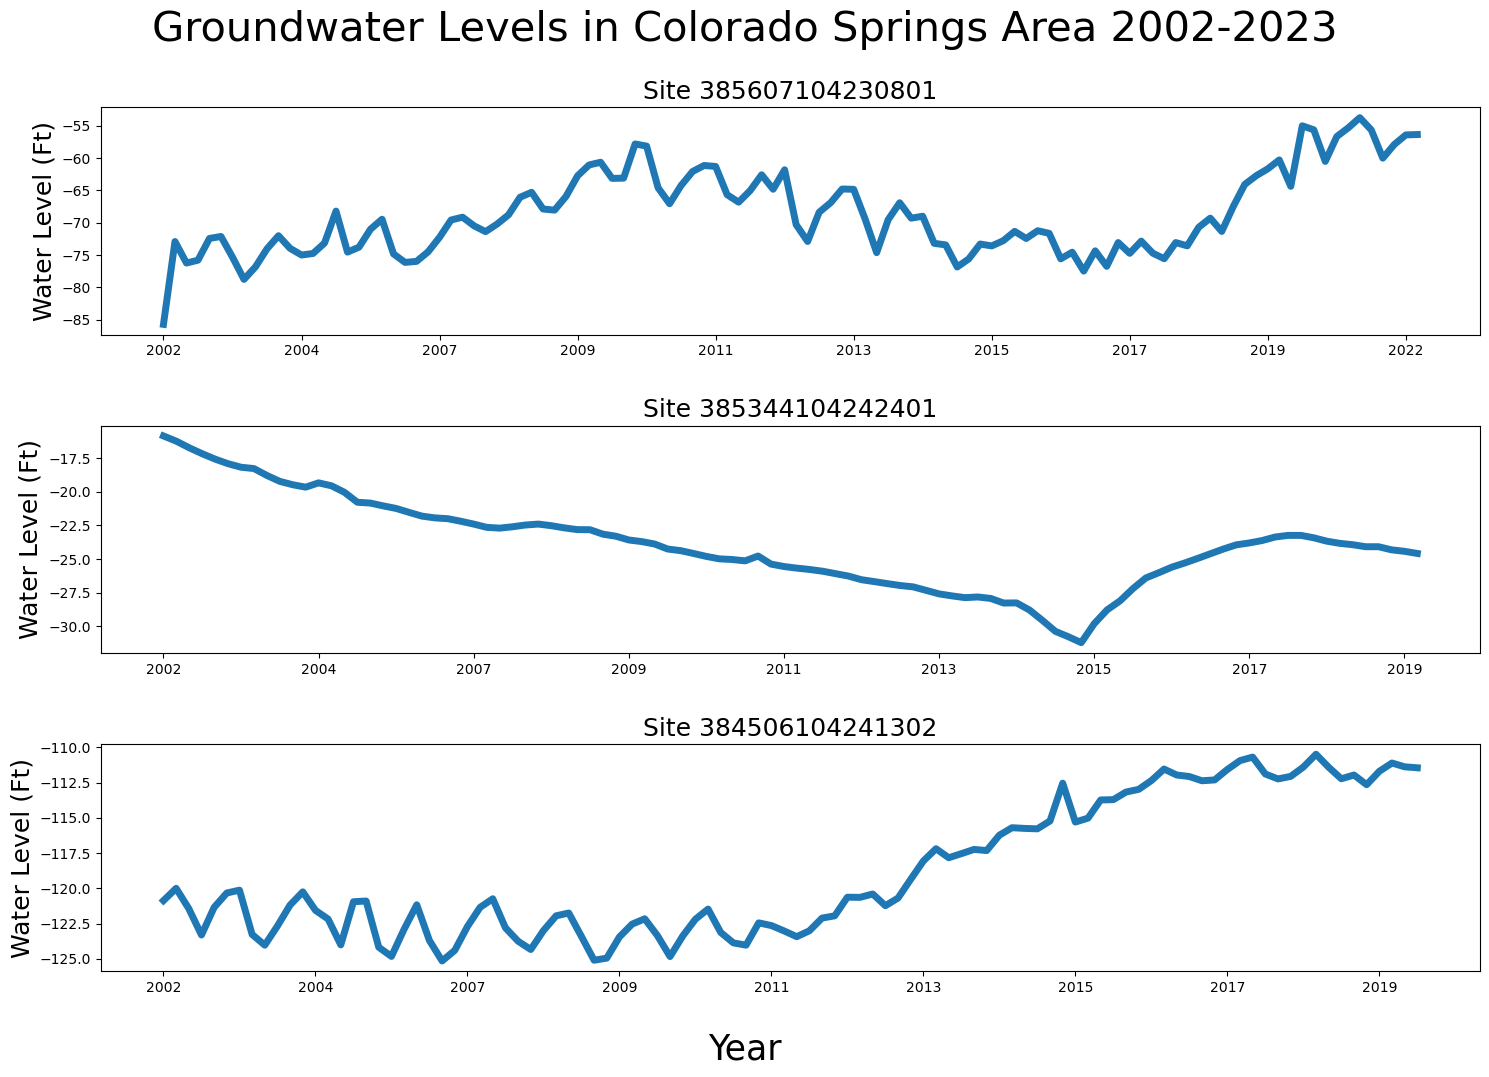

In [5]:
# create a figure that shows groundwater level over time for each of the three selected sites individually

fig, (ax1, ax2, ax3) = plt.subplots(
    nrows = 3,
    ncols = 1,
    figsize = (15,10),
)

fig.suptitle("Groundwater Levels in Colorado Springs Area 2002-2023", fontsize = 30, y= 1)
# Plot inverted Original value on y-axis, and time as x-axis for all three subplots 
# for tick labels, take only every twelfth value in order to make it more legible. 
ax1.plot(gr_colo_spr_3856["Time"], - gr_colo_spr_3856["Original Value"], linewidth = 5)
ax1.set_xticks(ticks = gr_colo_spr_3856["Time"][::12], labels = gr_colo_spr_3856["Year"][::12])
ax1.set_title("Site 385607104230801", fontsize = 18)
ax1.set_ylabel("Water Level (Ft)", fontsize = 18)

ax2.plot(gr_385344104242401["Time"], - gr_385344104242401["Original Value"], linewidth = 5)
ax2.set_xticks(gr_385344104242401["Time"][::12], gr_385344104242401["Year"][::12])
ax2.set_title("Site 385344104242401", fontsize = 18)
ax2.set_ylabel("Water Level (Ft)", fontsize = 18)

ax3.plot(gr_384506104241302["Time"], - gr_384506104241302['Original Value'], linewidth = 5)
ax3.set_xticks(gr_384506104241302['Time'][::12], gr_384506104241302["Year"][::12])
ax3.set_title("Site 384506104241302", fontsize = 18)
ax3.set_ylabel("Water Level (Ft)", fontsize = 18)

fig.text(0.5, -0.05, 'Year', ha='center', fontsize = 25)

fig.tight_layout()
fig.subplots_adjust(hspace=0.4)

plt.savefig("../presentation_figures/Figure6_Colorado_Springs_GWL_2002-2023")

#### Conclusions

For my first research question, visualizations of the groundwater level over time in these 3 sites shows no consistent trend at this time scale. Each site has an entirely different trend with no common breakpoints for rate of change. 

The data also showed no correlation to drought and wildfire trends during the same time period. There was no indication in the groundwater measurements in the year 2012 that the large Colorado Springs fire would occur that year, and there was not a consistent response in the following years. There was also no evidence in individual sites that their measurements correlated with the strong drought and wildfire spikes in the years 2002, 2012, and 2018, leading me to conclude that the correlation either occurs over longer time scales than individual years, or does not exist. 

### Figure 7: Groundwater Analysis for the state of Colorado

#### Part 1: Read in Groundwater Data from all site locations

The data were collected by the USGS National Groundwater Monitoring Network. The dataset was created by selecting individual sites located in multiple locations in Colorado: the northeast corner, where the Ogallala or Great Plains Aquifer extends into Colorado states lines, the Colorado Springs area, and the south central region of the state near the Rio Grande River. These were aggregated into 3 csv files, each containing site data from a single region listed above. 

These data have the same source, thus, the same difficulties of analysis as listed for Figure 6. 

In [6]:
gr_Colorado = pd.read_csv("../data/groundwater_data/USGS_ColoradoSprings/WATERLEVEL.csv")
gr_Colorado.append(pd.read_csv("../data/groundwater_data/USGS_Rio_Grande/WATERLEVEL.csv"))
gr_Colorado.append(pd.read_csv("../data/groundwater_data/USGS_Ogallala_Colorado/WATERLEVEL.csv"))

C:\Users\aaron\AppData\Local\Temp\ipykernel_26284\1807264063.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gr_Colorado.append(pd.read_csv("../data/groundwater_data/USGS_Rio_Grande/WATERLEVEL.csv"))
C:\Users\aaron\AppData\Local\Temp\ipykernel_26284\1807264063.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gr_Colorado.append(pd.read_csv("../data/groundwater_data/USGS_Ogallala_Colorado/WATERLEVEL.csv"))


,AgencyCd,SiteNo,Time,Original Parameter,Original Direction,Original Unit,Original Value,Accuracy Unit,Accuracy Value,Depth to Water Below Land Surface in ft.,Water level in feet relative to NGVD29,Comment,Observation Method,Data Provided by,Unnamed: 14,Water level in feet relative to NAVD88
0,USGS,385607104230801,2002-02-08T12:00:00-00:00,NaN,NaN,ft,85.72,ft,Unknown,85.72,6196.8,NaN,NaN,NaN,NaN,NaN
1,USGS,385607104230801,2002-04-11T12:00:00-00:00,NaN,NaN,ft,72.90,ft,Unknown,72.90,6209.6,NaN,NaN,NaN,NaN,NaN
2,USGS,385607104230801,2002-06-06T12:00:00-00:00,NaN,NaN,ft,76.23,ft,Unknown,76.23,6206.3,NaN,NaN,NaN,NaN,NaN
3,USGS,385607104230801,2002-11-21T12:00:00-00:00,NaN,NaN,ft,75.79,ft,Unknown,75.79,6206.7,NaN,NaN,NaN,NaN,NaN
4,USGS,385607104230801,2003-02-27T12:00:00-00:00,NaN,NaN,ft,72.42,ft,Unknown,72.42,6210.1,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51044,USGS,390740103055801,2023-03-18T00:00:00-00:00,NaN,NaN,ft,49.00,ft,Unknown,49.00,NaN,NaN,NaN,NaN,NaN,5035.0
51045,USGS,390740103055801,2023-03-19T00:00:00-00:00,NaN,NaN,ft,48.97,ft,Unknown,48.97,NaN,NaN,NaN,NaN,NaN,5035.0
51046,USGS,390740103055801,2023-03-20T00:00:00-00:00,NaN,NaN,ft,48.96,ft,Unknown,48.96,NaN,NaN,NaN,NaN,NaN,5035.0
51047,USGS,390740103055801,2023-03-21T00:00:00-00:00,NaN,NaN,ft,48.97,ft,Unknown,48.97,NaN,NaN,NaN,NaN,NaN,5035.0


#### Part 2: Process Data 


The goals for this analysis were to look at trends in aggregated data for the entire state of Colorado, and analyze them in relation to drought and wildfire trends in Colorado across the same time scale. I only included sites with data readings less than 2000 feet. I made this decision because these measurements were heavily concentrated after 2020, which would cause a dramatic shift in a measurement of the mean, and make it impossible to draw conclusions across that time range. 

This graph will show the mean groundwater level from all sites through time. In order to accomplish that, the data must be processed with the following steps:
- Filter out all groundwater level readings in the "Original Value" category that are greater than 2000
    - these values only occur in sites that were measured starting in 2021, which would greatly warp the graph at the location in time
- use the drop_duplicates() function to remove duplicate values should they exist
- transfrom the "Original Value" column to a listing that contains the average 
    - use groupby to split the "Time" column and apply the transform function based on mean
- apply the shift function to the filtered data
- sort the data by time based on ascending order
- extract the year from the "Time" column for easier legibility in the graph

In [7]:
# part 1
gr_Colorado_filtered = gr_Colorado[gr_Colorado['Original Value'] < 2000]
# part 2
gr_Colorado_filtered.drop_duplicates()
# part 3
gr_Colorado_filtered['mean'] = gr_Colorado_filtered.groupby("Time")['Original Value'].transform('mean')
# part 4
gr_Colorado_filtered = gr_Colorado_filtered[gr_Colorado_filtered['Original Value'].ne(gr_Colorado_filtered['Original Value'].shift())]
# part 5
gr_Colorado_filtered = gr_Colorado_filtered.sort_values(by='Time', ascending=True)
# part 6
gr_Colorado_filtered.index = pd.to_datetime(gr_Colorado_filtered["Time"])
gr_Colorado_filtered['Year'] = pd.DatetimeIndex(gr_Colorado_filtered['Time']).year

C:\Users\aaron\AppData\Local\Temp\ipykernel_26284\327567596.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gr_Colorado_filtered['mean'] = gr_Colorado_filtered.groupby("Time")['Original Value'].transform('mean')


#### Step 3: Plot Mean Data
- Plot the Mean of the Original Value of all datasites on the y-axis and Time on the x-axis.
- The original value will, once again, be plotted negative to properly correlate the vertical axis to the groundwater level relative to the surface. 
- Only every fourth value was plotted due to the high quantity of datapoints. The density was still high enough that the shape of the data was preserved, and the trends were more easily inferred.  
- The tick labels were plotted every 24 values to increase legibility. 

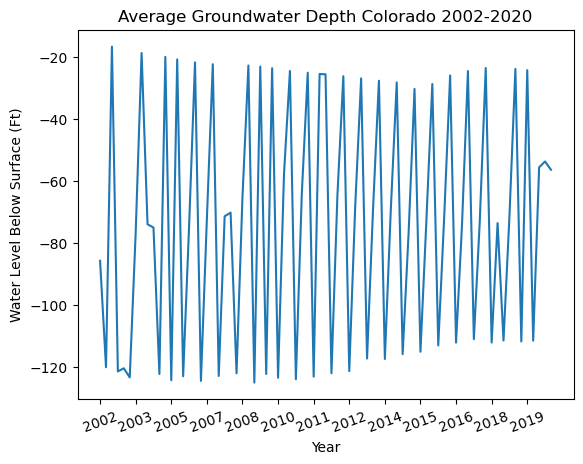

In [9]:
# plot negative of Original Value
fig = plt.plot(gr_Colorado_filtered["Time"][::4], - gr_Colorado_filtered["Original Value"][::4])
plt.xticks(gr_Colorado_filtered["Time"][::24], labels = gr_Colorado_filtered["Year"][::24], rotation = 20)
plt.title("Average Groundwater Depth Colorado 2002-2020")
plt.xlabel("Year")
plt.ylabel("Water Level Below Surface (Ft)")
plt.savefig("../presentation_figures/Figure7_Colorado_GWL_2002-2020", bbox_inches = 'tight')

#### Conclusions

With regard to my first research question, There was a slight, but consistent compressional trend in the data that persisted through the year 2015. The peaks slowly sunk, while the troughs slowly rose. After 2015, the peaks rebounded, while the troughs remained constant. This could be indicative of a consistent trend of lowering groundwater levels over time, however, data over a longer time scale would be needed to further analyze the existence of this trend. 

Analysis of statewide data did not reveal any increased correlation from the site specific analysis from Colorado Springs. There were no shifts in data corresponding to the powerful droubt and wildfire spikes in 2002, 2012, and 2018. 

I conclude that the suspected correlation between groundwater levels and droubt is not supported by this analysis. 